In [85]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
# Load Axial

df_Ax = pd.read_csv('Axial.csv', header=0, sep='\t')
df_Ax.head()

,Time (sec),Position (Flex Unit) (mm),Force (N),Strain (%),Stress (MPa)
0,0.214446,6.56133,0.266667,0.787360,0.499999
1,0.239655,6.56117,0.300000,0.787340,0.562499
2,0.264865,6.56158,0.332836,0.787389,0.624067
3,0.290074,6.56264,0.398833,0.787517,0.747810
4,0.315283,6.56481,0.509326,0.787777,0.954985


In [87]:
# Load Transverse

df_Tr = pd.read_csv('Transverse.csv', header=0, sep='\t')
df_Tr.head()

,Time (sec),Position (Flex Unit) (mm),Force (N),Strain (%),Stress (MPa)
0,0.178616,6.55367,0.700000,0.786440,1.31250
1,0.208509,6.55411,0.717710,0.786493,1.34570
2,0.238402,6.55555,0.733333,0.786665,1.37500
3,0.268295,6.55782,0.747750,0.786938,1.40203
4,0.298188,6.56050,0.766667,0.787260,1.43750


In [88]:
# Dimensions

Ax_l = 0.150
Ax_w = 0.025
Ax_d = 0.00197

Tr_l = 0.126
Tr_w = 0.027
Tr_d = 0.00193

L = 0.10
s = 0.03

Ax_I = (Ax_w * Ax_d**3) / 12
Tr_I = (Tr_w * Tr_d**3) / 12

df_Ax['Position (Flex Unit) (m)'] = df_Ax['Position (Flex Unit) (mm)'] / 1000
df_Tr['Position (Flex Unit) (m)'] = df_Tr['Position (Flex Unit) (mm)'] / 1000

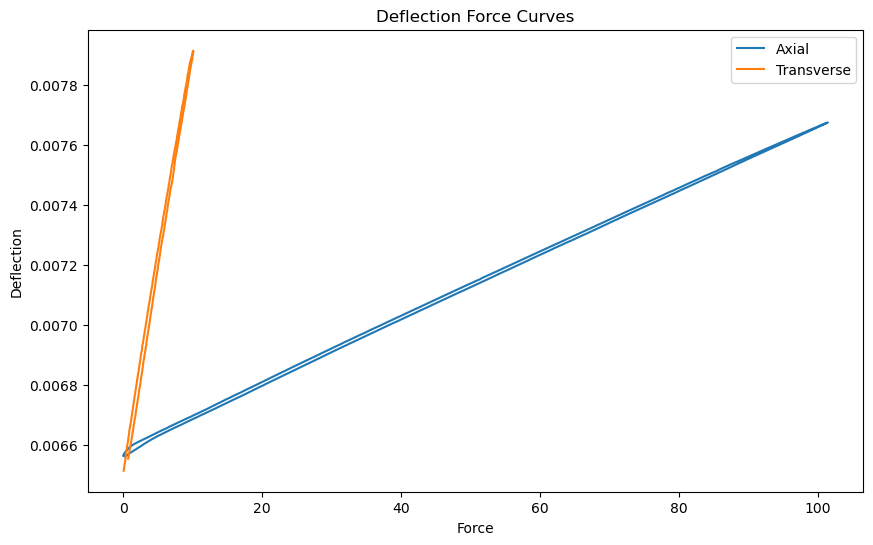

In [89]:
plt.figure(figsize=(10,6))
plt.plot(df_Ax['Force (N)'], df_Ax['Position (Flex Unit) (m)'], label='Axial')
plt.plot(df_Tr['Force (N)'], df_Tr['Position (Flex Unit) (m)'], label='Transverse')
plt.xlabel('Force')
plt.ylabel('Deflection')
plt.title('Deflection Force Curves')
plt.legend()
plt.savefig('Deflection_Force_Curves.png', dpi=1000)
plt.show()

In [90]:
Ax_grad, Ax_intercept = np.polyfit(df_Ax['Force (N)'], df_Ax['Position (Flex Unit) (m)'], 1)
Tr_grad, Tr_intercept = np.polyfit(df_Tr['Force (N)'], df_Tr['Position (Flex Unit) (m)'], 1)

Ax_E = (s*(3*L**2 - 4*s**2)) / (48*Ax_grad*Ax_I)
Tr_E = (s*(3*L**2 - 4*s**2)) / (48*Tr_grad*Tr_I)

print("Axial gradient (Young's modulus):", Ax_E)
print("Transverse gradient (Young's modulus):", Tr_E)

Axial gradient (Young's modulus): 95639347882.99582
Transverse gradient (Young's modulus): 7160580659.671842
